# 동물보호관리시스템 유기동물 조회 서비스

<https://www.data.go.kr/dataset/15001096/openapi.do>

터미널 또는 Git Bash에서 다음을 입력해 API 키를 사용합니다.

```bash
# 환경변수 설정. 발급 받은 키로 변경해 주세요.
# 1. 공공데이터포털
export ANIMAL_API_KEY=abcdefghijklm%2FvSfZeu4FoGpl2eGP%2FzlR5eGh%2F9M8jbOv4HPFZI%2BM7ckZstS8OzkMKHNBkpAtdZX6T8VoRl4Q%3D%3D
# 2. LocationIQ
export LOCATIONIQ_TOKEN=b023f593f83638

# Jupyter Notebook 실행
jupyter notebook
```

In [1]:
# 환경 변수에서 API 키 가져오기

import os
from urllib.parse import unquote

API_KEY = unquote(os.environ['ANIMAL_API_KEY'])
LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

## 라이브러리 사용

In [2]:
# requests 사용

import requests

requests.__version__

'2.22.0'

In [3]:
# Pandas 사용

import pandas as pd

pd.__version__

'0.24.2'

In [4]:
# Matplotlib 사용

import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.1'

In [5]:
# matplotlib에 “AppleGothc”(Mac) 또는 “Malgun Gothic”(Windows) 글꼴 적용

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

In [6]:
# folium 패키지 설치

!pip install folium

In [7]:
# folium 버전 확인

import folium

folium.__version__

'0.10.0'

In [8]:
# folium 라이브러리의 Map과 HeatMap 사용

from folium import Map
from folium.plugins import HeatMap

## 동물보호관리시스템 유기동물 조회 서비스 API 사용

많은 데이터를 다루기 위해 10,000개를 얻어오겠습니다.

In [9]:
# 동물보호관리시스템 유기동물 조회 서비스 API

url = 'http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic'

payload = {
    'serviceKey': API_KEY,
    'bgnde': '20190901',
    'endde': '20190930',
    'numOfRows': 10000,
}

response = requests.get(url, params=payload)

print(response)

<Response [200]>


In [10]:
# XML 데이터 파싱

import xml.etree.ElementTree as ET

root = ET.fromstring(response.text)

root

<Element 'response' at 0x11604a410>

In [11]:
# 컬럼 목록 얻기

item = next(root.iter('item'))

columns = []

for child in list(item):
    columns.append(child.tag)

columns

['age',
 'careAddr',
 'careNm',
 'careTel',
 'chargeNm',
 'colorCd',
 'desertionNo',
 'filename',
 'happenDt',
 'happenPlace',
 'kindCd',
 'neuterYn',
 'noticeEdt',
 'noticeNo',
 'noticeSdt',
 'officetel',
 'orgNm',
 'popfile',
 'processState',
 'sexCd',
 'specialMark',
 'weight']

In [12]:
# XML 데이터를 Pandas DataFrame으로 변환

rows = []

for item in root.iter('item'):
    row = {}
    for child in list(item):
        row[child.tag] = child.text
    rows.append(row)

df = pd.DataFrame(rows, columns=columns)

In [13]:
# 1. 컬럼 목록

df.columns

Index(['age', 'careAddr', 'careNm', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd',
       'neuterYn', 'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'orgNm',
       'popfile', 'processState', 'sexCd', 'specialMark', 'weight'],
      dtype='object')

In [14]:
# 2. 전체 갯수와 컬럼 갯수 확인

df.shape

(7063, 22)

In [15]:
# 3. 데이터 일부 확인

df.head()

,age,careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,happenPlace,...,noticeEdt,noticeNo,noticeSdt,officetel,orgNm,popfile,processState,sexCd,specialMark,weight
0,2018(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,크림,448532201900770,http://www.animal.go.kr/files/shelter/2019/09/...,20190919,진해구 웅천로 156,...,20190930,경남-창원3-2019-00439,20190919,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,"칩X, 쫑긋한 귀, 윤기나는 털, 우아한 분위기, 사람을 좋아하고 사랑스러움",3.5(Kg)
1,2018(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,크림,448532201900769,http://www.animal.go.kr/files/shelter/2019/09/...,20190919,진해구 웅천로 156,...,20190930,경남-창원3-2019-00438,20190919,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"칩X, 가을 햇살처럼 밝은아이, 처진귀,동그란눈 까맣고 매끈한 코,짧은 다리",4.9(Kg)
2,2018(년생),전라북도 장수군 장수읍 군청길 16 (장수읍) 문 동물병원,문 동물병원,010-8876-3475,장수군,흰색,445475201900136,http://www.animal.go.kr/files/shelter/2019/09/...,20190919,장계면 소비재로,...,20191007,전북-장수-2019-00186,20190919,063-350-2416,전라북도 장수군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,흰팩에 꼬리가 길고 꼬리털이 복실복실함,15(Kg)
3,2018(년생),강원도 춘천시 신샘밭로 213 (신동) 신동 1206-13번지,춘천시 동물보호센터,033-250-4773,심장수,흰색,442418201900569,http://www.animal.go.kr/files/shelter/2019/09/...,20190919,송암동 비발디파크모텔앞(서부지구대 인계),...,20190930,강원-춘천-2019-00493,20190919,033-250-3790,강원도 춘천시,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"흰색, 온순",4(Kg)
4,2013(년생),강원도 춘천시 신샘밭로 213 (신동) 신동 1206-13번지,춘천시 동물보호센터,033-250-4773,심장수,갈흰색,442418201900568,http://www.animal.go.kr/files/shelter/2019/09/...,20190919,후평동 116-16,...,20190930,강원-춘천-2019-00492,20190919,033-250-3790,강원도 춘천시,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,"갈흰색, 온순, 칩있음(410160020123816)",4(Kg)


In [16]:
# 컬럼별 결측값 갯수 확인

data = df.isnull().sum()

pd.DataFrame(data)

,0
age,0
careAddr,0
careNm,0
careTel,0
chargeNm,160
colorCd,0
desertionNo,0
filename,0
happenDt,0
happenPlace,0


In [17]:
# 안 쓰는 컬럼 이름을 넣어 drop해서 simple 데이터 만들기

simple_df = df.drop(columns=[
    'careTel', 'desertionNo', 'filename',
    'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'popfile'
])

# 정리된 데이터 확인

simple_df.head()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight
0,2018(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,진해구,크림,20190919,진해구 웅천로 156,[개] 믹스견,N,경상남도 창원시 진해구,보호중,F,"칩X, 쫑긋한 귀, 윤기나는 털, 우아한 분위기, 사람을 좋아하고 사랑스러움",3.5(Kg)
1,2018(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,진해구,크림,20190919,진해구 웅천로 156,[개] 믹스견,N,경상남도 창원시 진해구,보호중,M,"칩X, 가을 햇살처럼 밝은아이, 처진귀,동그란눈 까맣고 매끈한 코,짧은 다리",4.9(Kg)
2,2018(년생),전라북도 장수군 장수읍 군청길 16 (장수읍) 문 동물병원,문 동물병원,장수군,흰색,20190919,장계면 소비재로,[개] 믹스견,N,전라북도 장수군,보호중,M,흰팩에 꼬리가 길고 꼬리털이 복실복실함,15(Kg)
3,2018(년생),강원도 춘천시 신샘밭로 213 (신동) 신동 1206-13번지,춘천시 동물보호센터,심장수,흰색,20190919,송암동 비발디파크모텔앞(서부지구대 인계),[개] 믹스견,U,강원도 춘천시,보호중,M,"흰색, 온순",4(Kg)
4,2013(년생),강원도 춘천시 신샘밭로 213 (신동) 신동 1206-13번지,춘천시 동물보호센터,심장수,갈흰색,20190919,후평동 116-16,[개] 시츄,U,강원도 춘천시,보호중,F,"갈흰색, 온순, 칩있음(410160020123816)",4(Kg)


## 데이터 살펴보기

In [18]:
# 갯수 세기

data = simple_df['age'].value_counts()

pd.DataFrame(data)

,age
2019(년생),3519
2017(년생),880
2018(년생),856
2016(년생),682
2014(년생),312
2015(년생),294
2013(년생),164
2009(년생),97
2012(년생),90
2011(년생),86


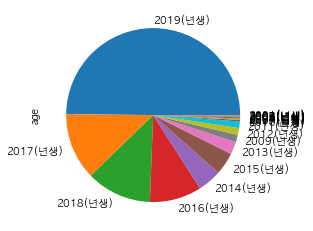

In [19]:
# 파이 그래프

data.plot.pie()

plt.show()

In [20]:
# 갯수 세기

data = simple_df['sexCd'].value_counts()

pd.DataFrame(data)

,sexCd
M,3326
F,3109
Q,628


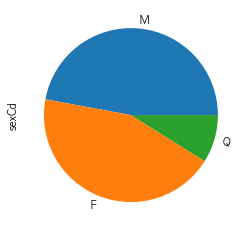

In [21]:
# 파이 그래프

data.plot.pie()

plt.show()

In [22]:
# 갯수 세기

data = simple_df['neuterYn'].value_counts()

pd.DataFrame(data)

,neuterYn
N,4465
U,2278
Y,320


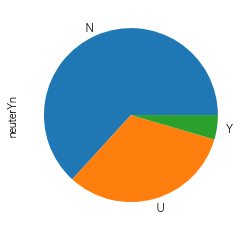

In [23]:
# 파이 그래프

data.plot.pie()

plt.show()

In [24]:
# 갯수 세기

data = simple_df['kindCd'].value_counts()

pd.DataFrame(data)

,kindCd
[개] 믹스견,3379
[고양이] 한국 고양이,1566
[개] 말티즈,337
[개] 푸들,300
[개] 진도견,170
[개] 포메라니안,124
[개] 시츄,95
[개] 요크셔 테리어,63
[개] 스피츠,58
[개] 치와와,58


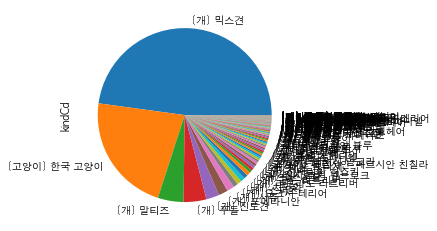

In [25]:
# 파이 그래프

data.plot.pie()

plt.show()

In [26]:
# 갯수 세기

data = simple_df['colorCd'].value_counts()

pd.DataFrame(data)

,colorCd
흰색,1256
갈색,694
검정,269
흰,222
삼색,121
백,105
검정색,101
황색,96
연갈색,91
갈,91


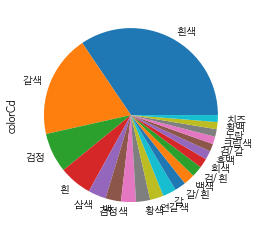

In [27]:
# 파이 그래프

# 데이터가 너무 많아서 20개로 제한
data = simple_df['colorCd'].value_counts().nlargest(20)

data.plot.pie()

plt.show()

In [28]:
# 갯수 세기

data = simple_df['happenDt'].value_counts()

pd.DataFrame(data)

,happenDt
20190916,752
20190902,659
20190909,616
20190911,516
20190910,515
20190917,502
20190905,500
20190903,475
20190904,472
20190906,444


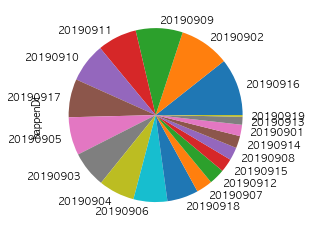

In [29]:
# 파이 그래프

data.plot.pie()

plt.show()

In [30]:
# 요일 구하기 (이 부분은 어렵습니다!)

DAYS = '일월화수목금토'

weekdays = []

for index in df.index:
    date = simple_df['happenDt'][index]
    # 2019년 9월 1일은 “일요일(0)”입니다.
    weekday = (int(date) - 20190901) % 7
    weekdays.append(DAYS[weekday])

simple_df = simple_df.assign(happenDay=weekdays)

simple_df.head()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay
0,2018(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,진해구,크림,20190919,진해구 웅천로 156,[개] 믹스견,N,경상남도 창원시 진해구,보호중,F,"칩X, 쫑긋한 귀, 윤기나는 털, 우아한 분위기, 사람을 좋아하고 사랑스러움",3.5(Kg),목
1,2018(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,진해구,크림,20190919,진해구 웅천로 156,[개] 믹스견,N,경상남도 창원시 진해구,보호중,M,"칩X, 가을 햇살처럼 밝은아이, 처진귀,동그란눈 까맣고 매끈한 코,짧은 다리",4.9(Kg),목
2,2018(년생),전라북도 장수군 장수읍 군청길 16 (장수읍) 문 동물병원,문 동물병원,장수군,흰색,20190919,장계면 소비재로,[개] 믹스견,N,전라북도 장수군,보호중,M,흰팩에 꼬리가 길고 꼬리털이 복실복실함,15(Kg),목
3,2018(년생),강원도 춘천시 신샘밭로 213 (신동) 신동 1206-13번지,춘천시 동물보호센터,심장수,흰색,20190919,송암동 비발디파크모텔앞(서부지구대 인계),[개] 믹스견,U,강원도 춘천시,보호중,M,"흰색, 온순",4(Kg),목
4,2013(년생),강원도 춘천시 신샘밭로 213 (신동) 신동 1206-13번지,춘천시 동물보호센터,심장수,갈흰색,20190919,후평동 116-16,[개] 시츄,U,강원도 춘천시,보호중,F,"갈흰색, 온순, 칩있음(410160020123816)",4(Kg),목


In [31]:
# 갯수 세기

data = simple_df['happenDay'].value_counts()

pd.DataFrame(data)

,happenDay
월,2027
화,1492
수,1398
목,730
금,548
일,496
토,372


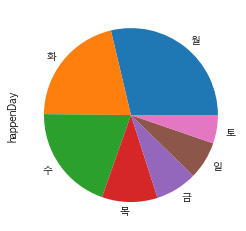

In [32]:
# 파이 그래프

data.plot.pie()

plt.show()

## 위도, 경도 얻기

반복적으로 써야 하니 함수를 만듭니다.

In [33]:
def geocode(address):
    url = 'https://us1.locationiq.com/v1/search.php'
    payload = {
        'key': LOCATIONIQ_TOKEN,
        'q': address,
        'format': 'json'
    }
    response = requests.get(url, params=payload)
    results = response.json()
    if 'error' in results:
        return None, None
    coordinates = results[0]
    return coordinates['lat'], coordinates['lon']

In [34]:
geocode('서울창업허브')

('37.54662875', '126.949684293519')

In [35]:
geocode('이 세계 어디에도 없는 주소')

(None, None)

In [36]:
# API 호출 및 지도에 표시하는 작업을 원활히 하기 위해 자료를 500개로 제한해서 sample 데이터를 만듭니다.

sample_df = simple_df.sample(n=500, random_state=1)

sample_df.shape

(500, 15)

In [37]:
# 위도, 경도 얻기

lats = []
lngs = []

for i, index in enumerate(sample_df.index):
    print(i + 1, '-', index)
    lat, lng = geocode(sample_df['orgNm'][index])
    lats.append(lat or 0)
    lngs.append(lng or 0)

sample_df = sample_df.assign(lat=lats, lng=lngs)

sample_df.head()

1 - 5343
2 - 4052
3 - 4624
4 - 5977
5 - 2819
6 - 1610
7 - 186
8 - 234
9 - 5328
10 - 1791
11 - 4080
12 - 4887
13 - 6743
14 - 1125
15 - 325
16 - 5904
17 - 767
18 - 5273
19 - 6301
20 - 2785
21 - 1232
22 - 3953
23 - 444
24 - 5895
25 - 3281
26 - 1790
27 - 751
28 - 2000
29 - 6015
30 - 4850
31 - 299
32 - 3830
33 - 354
34 - 1555
35 - 1933
36 - 6378
37 - 6719
38 - 718
39 - 2495
40 - 599
41 - 5185
42 - 343
43 - 1309
44 - 6822
45 - 1586
46 - 3152
47 - 2497
48 - 5885
49 - 3576
50 - 288
51 - 5605
52 - 3464
53 - 5524
54 - 1038
55 - 4029
56 - 4834
57 - 3405
58 - 1321
59 - 5486
60 - 4097
61 - 3780
62 - 1681
63 - 5999
64 - 1626
65 - 447
66 - 5064
67 - 3119
68 - 5831
69 - 5829
70 - 758
71 - 2045
72 - 4358
73 - 6887
74 - 3491
75 - 2968
76 - 2011
77 - 3092
78 - 6483
79 - 2505
80 - 5022
81 - 2065
82 - 4423
83 - 6426
84 - 4807
85 - 4848
86 - 5456
87 - 3612
88 - 5517
89 - 2864
90 - 2343
91 - 6046
92 - 3948
93 - 6737
94 - 5948
95 - 5212
96 - 1988
97 - 5537
98 - 6536
99 - 2093
100 - 5093
101 - 4189
102 - 2262


,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay,lat,lng
5343,2014(년생),부산광역시 강서구 가락대로1283번길 25-2 (봉림동),(사)유기동물및동물,김영하,연갈,20190904,구랑동 1221,[개] 포메라니안,U,부산광역시 강서구,보호중,M,강서-466,3(Kg),수,35.212,128.9805
4052,2018(년생),"경기도 고양시 덕양구 고양대로 1695 (원흥동, 고양시 농업기술센터) 고양시동물보호센터",고양시동물보호센터,김유미,"검정, 흰색",20190908,설문동 346-5 부근,[개] 믹스견,N,경기도 고양시,보호중,M,적색목줄 착용,11(Kg),일,37.6581862,126.8319452
4624,2017(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,진해구,크림,20190906,진해구 안골로 220번 나길,[개] 스피츠,N,경상남도 창원시 진해구,보호중,F,"칩x,목출착용, 크고 동그란 눈에 까만코,쫑긋한귀, 사람을 좋아하고 애교많은 아이",3.8(Kg),금,35.1319,128.7103
5977,2017(년생),대전광역시 유성구 갑동로15번길 20-39 (갑동),대전동물보호센터,조원배,백,20190903,대흥동 한마음정육식당 주변,[개] 포메라니안,U,대전광역시 중구,보호중,M,좌측전지파행,3.00(Kg),화,36.29812,127.4148
2819,2019(년생),"광주광역시 북구 본촌마을길 25 (본촌동, 건국동사무소) 광주 동물보호소",광주 동물보호소,서구,"검,흰",20190911,서구 광천동,[고양이] 한국 고양이,U,광주광역시 서구,보호중,M,19-7923,0.3(Kg),수,35.1521401,126.8900561


## 지도 그리기

위도/경도 데이터를 얻었기 때문에 지도에 그려볼 수 있습니다.

In [38]:
# 위도, 경도만 모읍니다.

coordinates = sample_df[['lat', 'lng']]

coordinates

,lat,lng
5343,35.212,128.9805
4052,37.6581862,126.8319452
4624,35.1319,128.7103
5977,36.29812,127.4148
2819,35.1521401,126.8900561
1610,35.49879045,129.345857526943
186,35.320878,126.9883238
234,36.784499,126.450317
5328,36.4104478,128.1590614
1791,34.854254,128.433205


In [39]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=5_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

In [40]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map